# Challenge #1 - Build Your Data Wrangling Skills

<small>Python for Data Science Automation Course (DS4B 101-P)</small><br>
<small>Business Science</small> 

## Challenge Summary

This is a short challenge to begin applying what you are learning to the course project. You will go through a series of questions related to the project goals:

1. Forecasting Revenue By Products

2. Forecasting Revenue By Customers

### Management Request

In the final report automations, management has requested an annual summary for the last five years. You know that we can make this with a pivot table. 


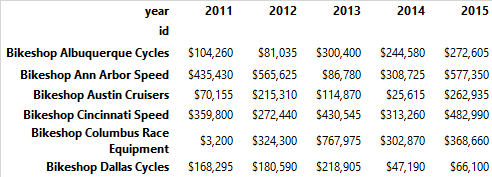

### Task

Use your `pandas` data wrangling skills to make a chart that summarizes annual sales by customer.

## Objectives:

1. Apply `pandas` functions to answer questions related to the course project.

2. Gain exposure to `jupyter` notebooks and labs

## Getting Started

### Check Working Directory

To read in the data, make sure your current working directory is set to the project directory. Two useful [jupyter magic commands](https://ipython.readthedocs.io/en/stable/interactive/magics.html) are:

1. `%pwd`: [Print working directory](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-cd) (you can detect your current directory)
2. `%cd`: You can [change directory](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-cd) to your working directory using relative paths or full paths. 


In [1]:
%pwd

'/Users/vadiveld/PycharmProjects/Python-Business-science/Challenge 1 2'

In [2]:
%cd ../

/Users/vadiveld/PycharmProjects/Python-Business-science


/Users/vadiveld/PycharmProjects/Python-Business-science/.venv/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


### Python Package Imports

In [3]:
# imports
import pandas as pd
import numpy as np
from mizani.formatters import currency_format
from path import Path

from transformer.bike_order_transformer import BikeOrderTransformer

In [13]:
database_folder_path = Path("/Users/vadiveld/PycharmProjects/Python-Business-science/data/database")
challenge_folder_path = Path("/Users/vadiveld/PycharmProjects/Python-Business-science/Challenge 1 2/")
conn_string = f"sqlite:///{database_folder_path}/bikes_order_database.sqlite"


### Import Data

In [5]:

bike_order_line_df = BikeOrderTransformer(conn_string).transform_data()

In [6]:
bike_order_line_df.head()

,order_id,order_line,order_date,model,quantity,price,total_price,bikeshop_name,location,category_1,category_2,frame_material,city,state
0,1,1,2011-01-07 00:00:00,Jekyll Carbon 2,1,6070,6070,Ithaca Mountain Climbers,"Ithaca, NY",Mountain,Over Mountain,Carbon,Ithaca,NY
1,1,2,2011-01-07 00:00:00,Trigger Carbon 2,1,5970,5970,Ithaca Mountain Climbers,"Ithaca, NY",Mountain,Over Mountain,Carbon,Ithaca,NY
2,2,1,2011-01-10 00:00:00,Beast of the East 1,1,2770,2770,Kansas City 29ers,"Kansas City, KS",Mountain,Trail,Aluminum,Kansas City,KS
3,2,2,2011-01-10 00:00:00,Trigger Carbon 2,1,5970,5970,Kansas City 29ers,"Kansas City, KS",Mountain,Over Mountain,Carbon,Kansas City,KS
4,3,1,2011-01-10 00:00:00,Supersix Evo Hi-Mod Team,1,10660,10660,Louisville Race Equipment,"Louisville, KY",Road,Elite Road,Carbon,Louisville,KY


We'll use the following packages in this challenge. 

## Challenge

Perform the following tasks. 

### Task 1: Groupby, Resample, Summarize Your Raw Data

1. Start with `df`
2. Select the columns "bikeshop_name", "order_date", and "total_price"
3. Unite the text "Bikeshop " to the begining of bikeshop_name (e.g. 'Albuquerque Cycles' should become 'Bikeshop Albuquerque Cycles')
4. Rename the columns: 'id', 'date', and 'value'
5. Set the index to the 'date' column
6. Group by the 'id' column
7. Resample yearly (start of the year)
8. Aggregate using sum
9. Reset the index
11. Save the output as `summary_df_1`

In [9]:
bike_order_line_df['order_date'] = pd.to_datetime(bike_order_line_df['order_date'])

In [11]:
# Code
summary_df_1 = (
    bike_order_line_df
    [['bikeshop_name','order_date','total_price']]\
    .assign(bikeshop_name = lambda x:'Bikeshop ' + x['bikeshop_name'])
    .rename(columns = {'bikeshop_name' : 'id','order_date' : 'date', 'total_price':'value'})
    .set_index('date')
    .groupby('id')
    .resample('YS')
    .agg(value = ('value','sum'))
    .reset_index()
)



/var/folders/hh/8c9bdtz97vs7pb_m1p4ff4wm0000gn/T/ipykernel_61758/2295354161.py:3: FutureWarning: DataFrameGroupBy.resample operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  bike_order_line_df


### Task 2: Pivot and Format Your Summary Table

In [14]:
summary_df_1 = pd.read_pickle(challenge_folder_path/"data/summary_df_1.pkl")

1. Start with `summary_df_1`
2. Format the date as year using the dt accessor
2. Pivot the data using id as the id, date as the columns, and the summarized total_price as the values
4. Save the result as `summary_df_2`

In [17]:
summary_df_1.columns

Index(['id', 'date', 'value'], dtype='object')

In [20]:
# Code
summary_df_2 = (summary_df_1 
 .assign(date = lambda x:x['date'].dt.year)
 .pivot(index = 'id',columns = 'date',values = 'value')
)


### Task 3: Make a USD Dollar Converter

1. Make a `usd = dollar_format()` that converts `usd([1000])` into `$1000`.
2. Prove that it works. Convert a list of `[100, 1000, 10000]` to a list of text-dollar values. 

In [21]:
# Code
usd = currency_format(prefix = '$',big_mark=',', precision = 0)


In [22]:
usd([100, 1000, 1000])

['$100', '$1,000', '$1,000']

### Task 4: Apply styles to your table

In [23]:
summary_df_2 = pd.read_pickle(challenge_folder_path / "data/summary_df_2.pkl")

1. Start with `summary_df_2`.
2. Use `df.style.highlight_max()` to highlight the maximum values
3. Apply the `usd()` function using `.format(lambda x: [YOUR CODE HERE])`. Hint: You'll need to work with casting to lists and extract elements from lists. 

In [26]:
# Code
(summary_df_2
 .style.highlight_max()
  .format(lambda x: usd([x])[0])
 )




date,2011,2012,2013,2014,2015
id,,,,,
Bikeshop Albuquerque Cycles,"$104,260","$81,035","$300,400","$244,580","$272,605"
Bikeshop Ann Arbor Speed,"$435,430","$565,625","$86,780","$308,725","$577,350"
Bikeshop Austin Cruisers,"$70,155","$215,310","$114,870","$25,615","$262,935"
Bikeshop Cincinnati Speed,"$359,800","$272,440","$430,545","$313,260","$482,990"
Bikeshop Columbus Race Equipment,"$3,200","$324,300","$767,975","$302,870","$368,660"
Bikeshop Dallas Cycles,"$168,295","$180,590","$218,905","$47,190","$66,100"
Bikeshop Denver Bike Shop,"$1,812,640","$1,292,015","$1,411,365","$1,570,640","$1,611,010"
Bikeshop Detroit Cycles,"$156,255","$162,165","$636,535","$408,450","$274,440"
Bikeshop Indianapolis Velocipedes,"$108,760","$133,555","$165,015","$336,615","$197,060"


## Nice Work

This challenge tested your wrangling abilities. If you nailed it, you're doing awesome. If you didn't, guess what - You're still awesome too! Keep in mind you're learning, it takes time, and these challenges are meant to be *challenging*. 